In [1]:
import pygmt
import geopandas as gpd
import rioxarray

In [2]:
grid = pygmt.datasets.load_earth_relief(resolution="05m", region=[-130, -65, 24, 52])
grid.rio.write_crs("epsg:4326", inplace=True)


<xarray.DataArray 'z' (lat: 337, lon: 781)> Size: 2MB
array([[-4623.5, -4609.5, -4604.5, ..., -5719. , -5776. , -5785.5],
       [-4604. , -4598. , -4564. , ..., -5792. , -5817.5, -5810. ],
       [-4546. , -4530. , -4517. , ..., -5825.5, -5841. , -5821. ],
       ...,
       [ -175. ,  -181.5,  -213.5, ...,   650.5,   642. ,   666. ],
       [ -141.5,  -135. ,  -136. , ...,   612. ,   606.5,   607. ],
       [ -131. ,  -123.5,  -118.5, ...,   610.5,   605. ,   615. ]])
Coordinates:
  * lat          (lat) float64 3kB 24.0 24.08 24.17 24.25 ... 51.83 51.92 52.0
  * lon          (lon) float64 6kB -130.0 -129.9 -129.8 ... -65.17 -65.08 -65.0
    spatial_ref  int64 8B 0
Attributes:
    Conventions:       CF-1.7
    title:             
    history:           gmt grdblend @earth_relief_05m_g/ -R-130/-65/24/52 -I0...
    description:       IGPP Earth relief
    long_name:         z
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [3]:
shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_shape = shapefile[(shapefile.name == "United States of America") & (shapefile.continent == "North America")]

clipped = grid.rio.clip(us_shape.geometry.values, us_shape.crs, drop=False, invert=False)

/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_5659/1342088690.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [10]:
us_shape

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


coast [WARNING]: No country code matching UnitedStates (skipped)
/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_5659/2441054016.py:21: FutureWarning: The 'interval' parameter has been deprecated since v0.12.0 and will be removed in v0.16.0. Please use 'levels' instead.
  fig.grdcontour(clipped, interval=500)


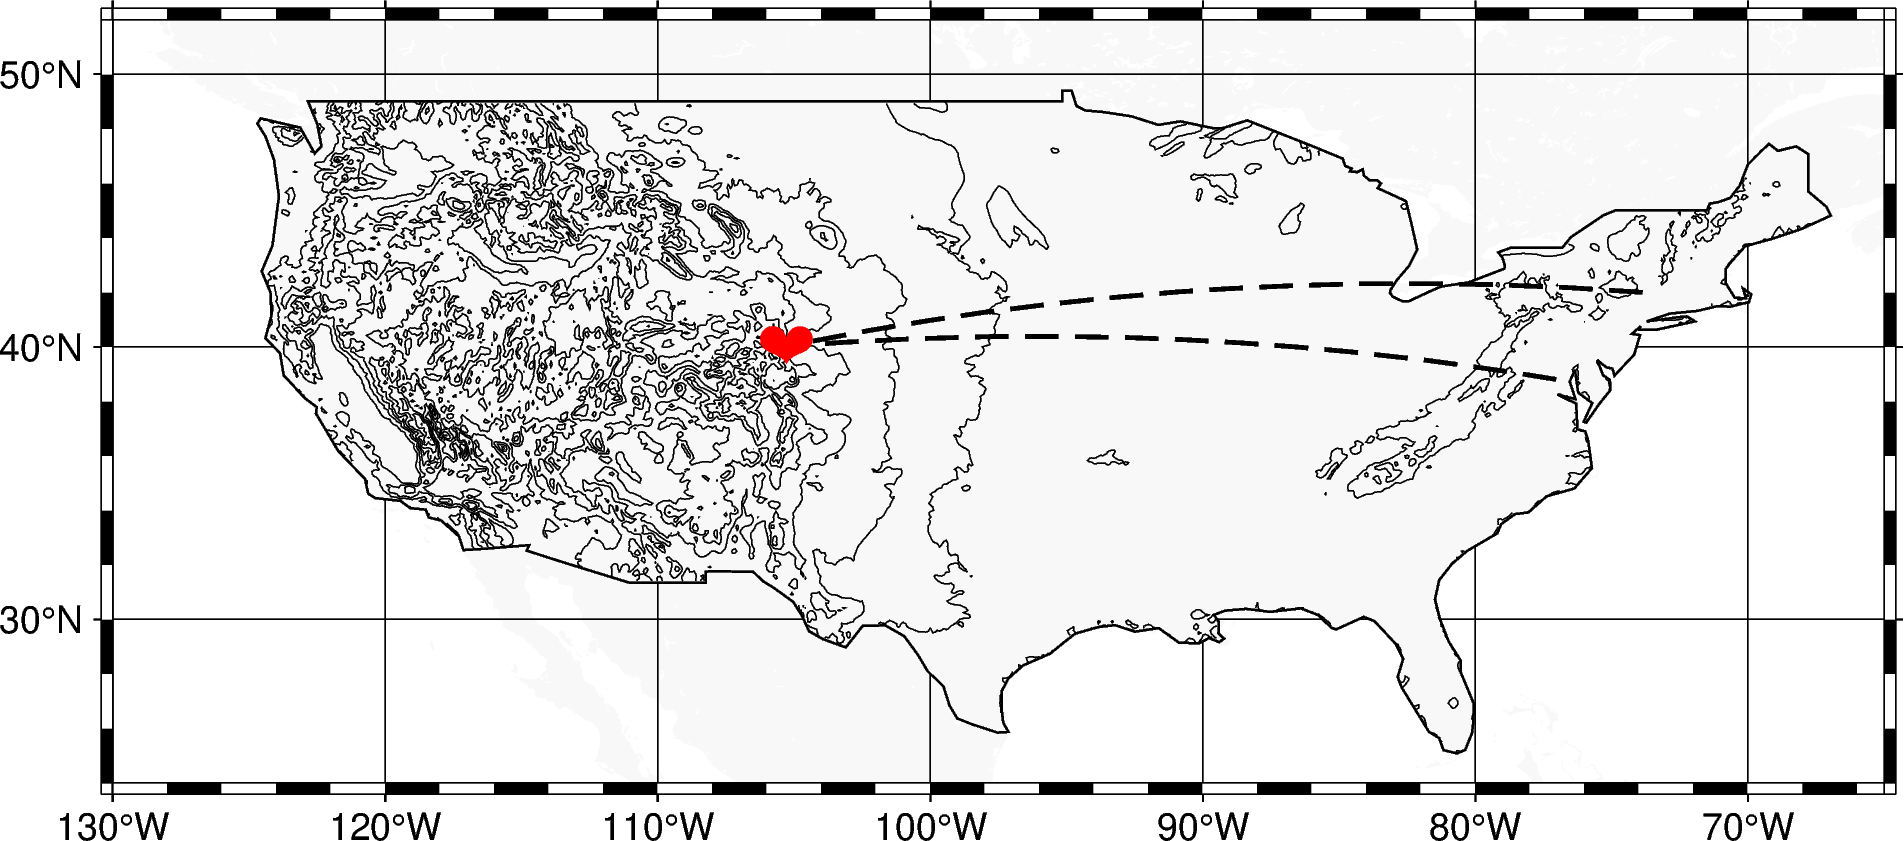

In [20]:
import pygmt

fig = pygmt.Figure()
region=[-130, -65, 24, 52]

# Set up the map
fig.coast(
    region=region,
    water="white",
    land="#f8f8f8",
    frame="afg",
    dcw=[
        "UnitedStates+gseagreen"
    ],
)


fig.plot(data=us_shape, pen="0.5p", region=region, fill="#f8f8f8")

# Assuming 'clipped' is your grid for contouring
fig.grdcontour(clipped, interval=500)

# Plotting locations as dots
locations = {
    "Red Hook, NY": [-73.8754, 41.9948],
    "Alexandria, VA": [-77.0469, 38.8048],
    "Boulder, CO": [-105.2705, 40.0150]
}

fig.plot(
    x=[-73.8754, -105.2705],
    y=[41.9948, 40.0150],
    pen="1p,-",
)

fig.plot(
    x=[-77.0469, -105.2705],
    y=[38.8048, 40.0150],
    pen="1p,-",
)

fig.text(text="\u2764",x=-105.2705, y=40.0150,font="15p,red")

# Show the plot
fig.show()
